In [1]:
import mdtraj as md
traj = md.load('C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_fit.xtc', top='C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns.pdb')
print(traj)
# may take 15+ minutes

<mdtraj.Trajectory with 2001 frames, 200131 atoms, 63027 residues, and unitcells>


In [24]:
atom_to_keep2 = [a.index for a in traj.topology.atoms if a.name == 'CA']
traj.restrict_atoms(atom_to_keep2)  # this acts inplace on the trajectory
traj.save('CA-only_1.h5')

In [25]:
traj2 = md.load('CA-only_1.h5')
traj2
#print("Hi")
print(traj2.xyz.shape)

(2001, 851, 3)


In [27]:
first_frame = md.load_frame('CA-only_1.h5',2000)
first_frame
rmsds = []
for chunk in md.iterload('CA-only_1.h5', chunk=100):
    rmsds.append(md.rmsd(chunk, first_frame))
    #print(chunk, '\n', chunk.time)

In [28]:
import numpy as np
rmsds = np.concatenate(rmsds)

print(rmsds)
print('max rmsd ', np.max(rmsds), 'at index', np.argmax(rmsds))

[0.17641605 0.16027069 0.16151883 ... 0.07187667 0.06526633 0.        ]
max rmsd  0.23346314 at index 877


In [29]:
import numpy as np
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.272083 nm


In [30]:
print('How many atoms?    %s' % traj.n_atoms)
print('How many residues? %s' % traj.n_residues)

How many atoms?    851
How many residues? 851


In [31]:
topology = traj.topology
print(topology)

<mdtraj.Topology with 1 chains, 851 residues, 851 atoms, 0 bonds>


In [32]:
print('All residues: %s' % [residue for residue in traj.topology.residues])

All residues: [VAL31, TYR32, ARG33, ALA34, PHE35, ASP36, ILE37, TYR38, ASN39, ASP40, LYS41, VAL42, ALA43, GLY44, PHE45, ALA46, LYS47, PHE48, LEU49, LYS50, TYR69, PHE70, VAL71, VAL72, LYS73, ARG74, THR76, PHE77, SER78, ASN79, TYR80, GLN81, HIS82, GLU83, GLU84, THR85, ILE86, TYR87, ASN88, LEU89, LEU90, LYS91, ASP92, CYS93, PRO94, ALA95, VAL96, ALA97, LYS98, HIS99, ASP100, PHE101, PHE102, PRO112, HIS113, ILE114, SER115, ARG116, GLN117, ARG118, LEU119, THR120, LYS121, TYR122, THR123, MET124, ALA125, ASP126, LEU127, VAL128, TYR129, ALA130, LEU131, ARG132, HIS133, PHE134, ASP135, GLU136, GLY137, ASN138, CYS139, ASP140, THR141, LEU142, LYS143, GLU144, ILE145, LEU146, VAL147, THR148, TYR149, ASN150, CYS151, CYS152, ASP153, ASP154, ASP155, TYR156, PHE157, ASN158, LYS159, LYS160, ASP161, TRP162, TYR163, ASP164, PHE165, VAL166, GLU167, ASN168, PRO169, ASP170, ILE171, LEU172, ARG173, VAL174, TYR175, ALA176, ASN177, LEU178, GLY179, GLU180, ARG181, VAL182, ARG183, GLN184, ALA185, LEU186, LEU187, LYS

In [49]:
## # solvent accessible surface area


sasa = md.shrake_rupley(traj, probe_radius=0.25, n_sphere_points=960, mode='residue')

print(traj)
print('sasa data shape', sasa.shape)

<mdtraj.Trajectory with 2001 frames, 851 atoms, 851 residues, and unitcells>
sasa data shape (2001, 851)


In [50]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

(2001,)


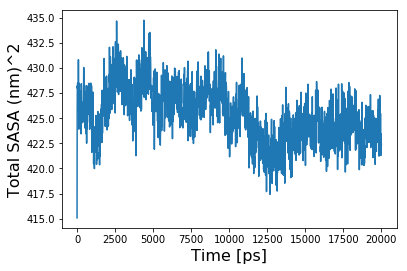

In [51]:
from matplotlib.pylab import *

plot(traj.time, total_sasa)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)
show()
# Compute the solvent accessible surface area of each atom or residue in each simulation frame.

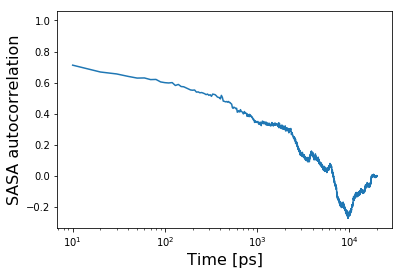

In [52]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(traj.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

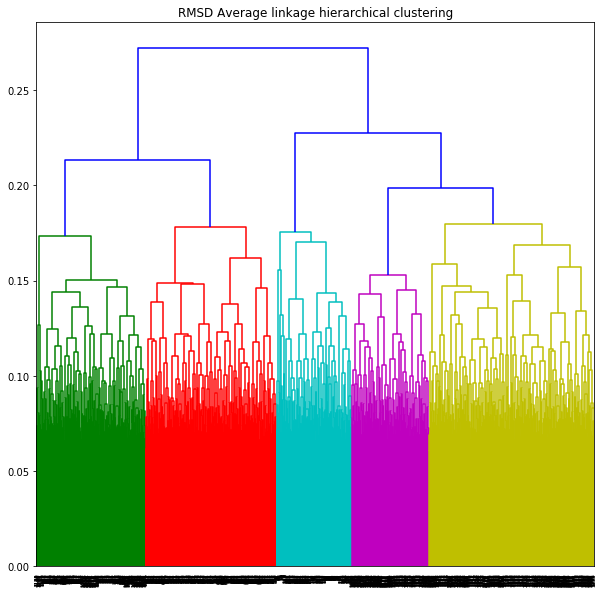

In [37]:
# cluster
from __future__ import print_function
get_ipython().magic(u'matplotlib inline')
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
#distances = np.empty((traj.n_frames, traj.n_frames))
# Clustering only accepts reduced form. Squareform's checks are too stringent
assert np.all(distances - distances.T < 1e-3)
reduced_distances = squareform(distances, checks=False)
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='complete')
#print(linkage)
fig = plt.figure(figsize=(10,10))
plt.title('RMSD Average linkage hierarchical clustering')
xyz = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=False, count_sort='descendent',p=0)
#plt.plot(xyz)

fig.savefig("cluster.png", dpi=300)

In [16]:
#import mdtraj as md
#traj2 = md.load('C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_fit.xtc', top='C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns.pdb')
atoms, bonds = traj.topology.to_dataframe()
#atoms

In [17]:
md_phi = md.compute_phi(traj)

In [18]:
md_psi = md.compute_psi(traj)

In [19]:
md_phi

(array([[   16,    18,    20,    37],
        [   37,    39,    41,    61],
        [   61,    63,    65,    71],
        ...,
        [13500, 13502, 13504, 13515],
        [13515, 13517, 13521, 13529],
        [13529, 13531, 13533, 13544]]),
 array([[-2.3241143 , -2.2896068 , -1.0121126 , ..., -1.8376853 ,
         -0.721916  , -1.9125293 ],
        [-2.0420308 , -2.0701063 , -1.670229  , ..., -1.692978  ,
         -0.69000804, -1.4051028 ],
        [-1.4660435 , -2.3836424 , -1.6889182 , ..., -1.572058  ,
         -0.6989729 , -1.6704859 ],
        ...,
        [-1.7594395 , -2.4479663 , -1.2149436 , ..., -1.5042161 ,
         -0.86772865, -1.0281967 ],
        [-1.4240012 , -2.4216135 , -1.3765512 , ..., -1.7854841 ,
         -0.7246443 , -1.2527201 ],
        [-1.9149022 , -2.3132927 , -1.3951243 , ..., -1.8590232 ,
         -0.9554879 , -1.6148059 ]], dtype=float32))

In [21]:
psi_indices, phi_indices = [   16,    18,    20,    37], [    0,     4,    16,    18]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

(-3.141592653589793, 3.141592653589793)

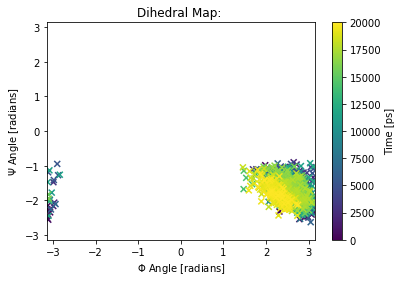

In [23]:

%matplotlib inline
from __future__ import print_function
from pylab import *
from math import pi

figure()
title('Dihedral Map: ')
scatter(angles[:, 0], angles[:, 1], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

In [57]:
# Radius of Gyration
rgyr = md.compute_rg(traj)
rgyr

array([2.95306766, 2.9733934 , 2.97236542, ..., 2.97895747, 2.98233842,
       2.98096686])

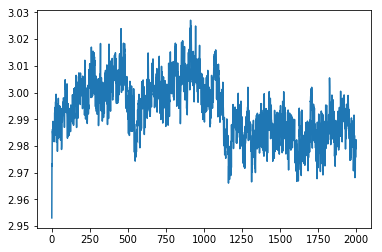

In [56]:
plot(rgyr)
# X axis - time(ns)
# Y axis - Gyration

In [64]:
trajdssp = md.load('C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_protein.xtc', top='C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_protein_2000.pdb')
dssp = md.compute_dssp(trajdssp, simplified=True)
dssp

array([['C', 'C', 'E', ..., 'C', 'C', 'C'],
       ['C', 'C', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'C', 'E', ..., 'C', 'C', 'C'],
       ['C', 'C', 'E', ..., 'C', 'C', 'C'],
       ['C', 'C', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

The DSSP assignment codes are:

‘H’ : Alpha helix
‘B’ : Residue in isolated beta-bridge
‘E’ : Extended strand, participates in beta ladder
‘G’ : 3-helix (3/10 helix)
‘I’ : 5 helix (pi helix)
‘T’ : hydrogen bonded turn
‘S’ : bend
‘ ‘ : Loops and irregular elements
The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.
‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.
‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [82]:
import pandas as pd
dsspTable=[]
for x in range(0,2000):
    #dsspTable.append(pd.DataFrame(dssp[x]))
    dsspTable.append(dssp[x])
    

In [86]:
df = pd.DataFrame(dsspTable)
df.to_csv('file_name.csv') 


In [87]:
# opne this out in eXcdl Via Import with delimiter "Commma" to view details
# Manually Append Residue list ( please check Residue list code, which I given above), then copy properly on 
# Firts Row of excel file

In [88]:
# in my cexperiment activie sites are LYS 47, Tyr 129,Asn138,Thr 141Ser709,Thr710,Ser778,Asn781,Ser784
# these data I got from LigPlus+ software.


In [90]:
# After Analysis of dssp_analysis1.xls, observed the trend of above active site - Residues

# Found that ASn 138, changed over a time C - E - H
# SER 709, C to H
# others no change
# these chnages, are want I need over a time frame - Transformations !!

In [91]:
#For more analysis
trajdssp = md.load('C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_protein.xtc', top='C:\\Users\\radha\\Desktop\\20nsXVG\\md20ns_protein_2000.pdb')
dssp = md.compute_dssp(trajdssp, simplified=False)
dsspTable=[]
for x in range(0,2000):
    #dsspTable.append(pd.DataFrame(dssp[x]))
    dsspTable.append(dssp[x])
    
df = pd.DataFrame(dsspTable)
df.to_csv('file_name2.csv') 

In [92]:
# Found that ASn 138, changed over a time B - G -S - T ( Beta Bridge - 3 Helix - Bend - Turn)
# SER 709, changed ove G - H - S  - T ( 3 Helix - Alpha Helix - Bend - Turn)